<a href="https://colab.research.google.com/github/redita22/CSE475_2021-2-60-099/blob/main/2021_2_60_099_Lab1_475.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### In this file, **Decision Tree** and **Random Forest** was applied to **Mango Leaf Dataset**. This file also contains the evaluation and performance comparison of both of these models.

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image
import os
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
# Load the MangoLeafBD dataset
data_dir = '/content/drive/MyDrive/475/MangoLeafBD Dataset'


In [56]:
import os
print(os.listdir(data_dir))

['Cutting Weevil', 'Bacterial Canker', 'Sooty Mould', 'Powdery Mildew', 'Gall Midge', 'Healthy', 'Die Back', 'Anthracnose', 'Index', 'README', 'agaricus-lepiota.data', 'agaricus-lepiota.names', 'expanded.Z', 'MangoLeafBD Dataset']


In [57]:
# Define image size for resizing
image_size = (64, 64)
data = []
labels = []

# Specify your dataset folder path
dataset_folder_path = "/content/drive/MyDrive/475/MangoLeafBD Dataset"

# Loop through each class folder
for class_label in os.listdir(dataset_folder_path):
    class_folder = os.path.join(dataset_folder_path, class_label)
    if os.path.isdir(class_folder):  # Ensure it's a folder
        for image_file in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_file)
            try:
                # Open, resize, and convert to RGB
                img = Image.open(image_path).resize(image_size).convert('RGB')
                img_array = np.array(img).flatten()  # Flatten the 64x64x3 image to a 1D array
                data.append(img_array)
                labels.append(class_label)  # Label from folder name
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

# Convert lists to numpy arrays for easier processing
data = np.array(data)
labels = np.array(labels)
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)


Error processing image /content/drive/MyDrive/475/MangoLeafBD Dataset/MangoLeafBD Dataset/Anthracnose: [Errno 21] Is a directory: '/content/drive/MyDrive/475/MangoLeafBD Dataset/MangoLeafBD Dataset/Anthracnose'
Error processing image /content/drive/MyDrive/475/MangoLeafBD Dataset/MangoLeafBD Dataset/Bacterial Canker: [Errno 21] Is a directory: '/content/drive/MyDrive/475/MangoLeafBD Dataset/MangoLeafBD Dataset/Bacterial Canker'
Error processing image /content/drive/MyDrive/475/MangoLeafBD Dataset/MangoLeafBD Dataset/Cutting Weevil: [Errno 21] Is a directory: '/content/drive/MyDrive/475/MangoLeafBD Dataset/MangoLeafBD Dataset/Cutting Weevil'
Error processing image /content/drive/MyDrive/475/MangoLeafBD Dataset/MangoLeafBD Dataset/Die Back: [Errno 21] Is a directory: '/content/drive/MyDrive/475/MangoLeafBD Dataset/MangoLeafBD Dataset/Die Back'
Error processing image /content/drive/MyDrive/475/MangoLeafBD Dataset/MangoLeafBD Dataset/Gall Midge: [Errno 21] Is a directory: '/content/drive/M

In [58]:
# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (3200, 12288)
Test set shape: (800, 12288)


In [59]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)
print("Model training complete.")


Model training complete.


### **The visualization of Decision Tree:**

In [60]:
# Create a decision tree classifier with gini criterion and maximum depth of 3
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
# Fit the model on the train data
dt.fit(X_train, y_train)
# Make predictions on the test data
y_pred = dt.predict(X_test)

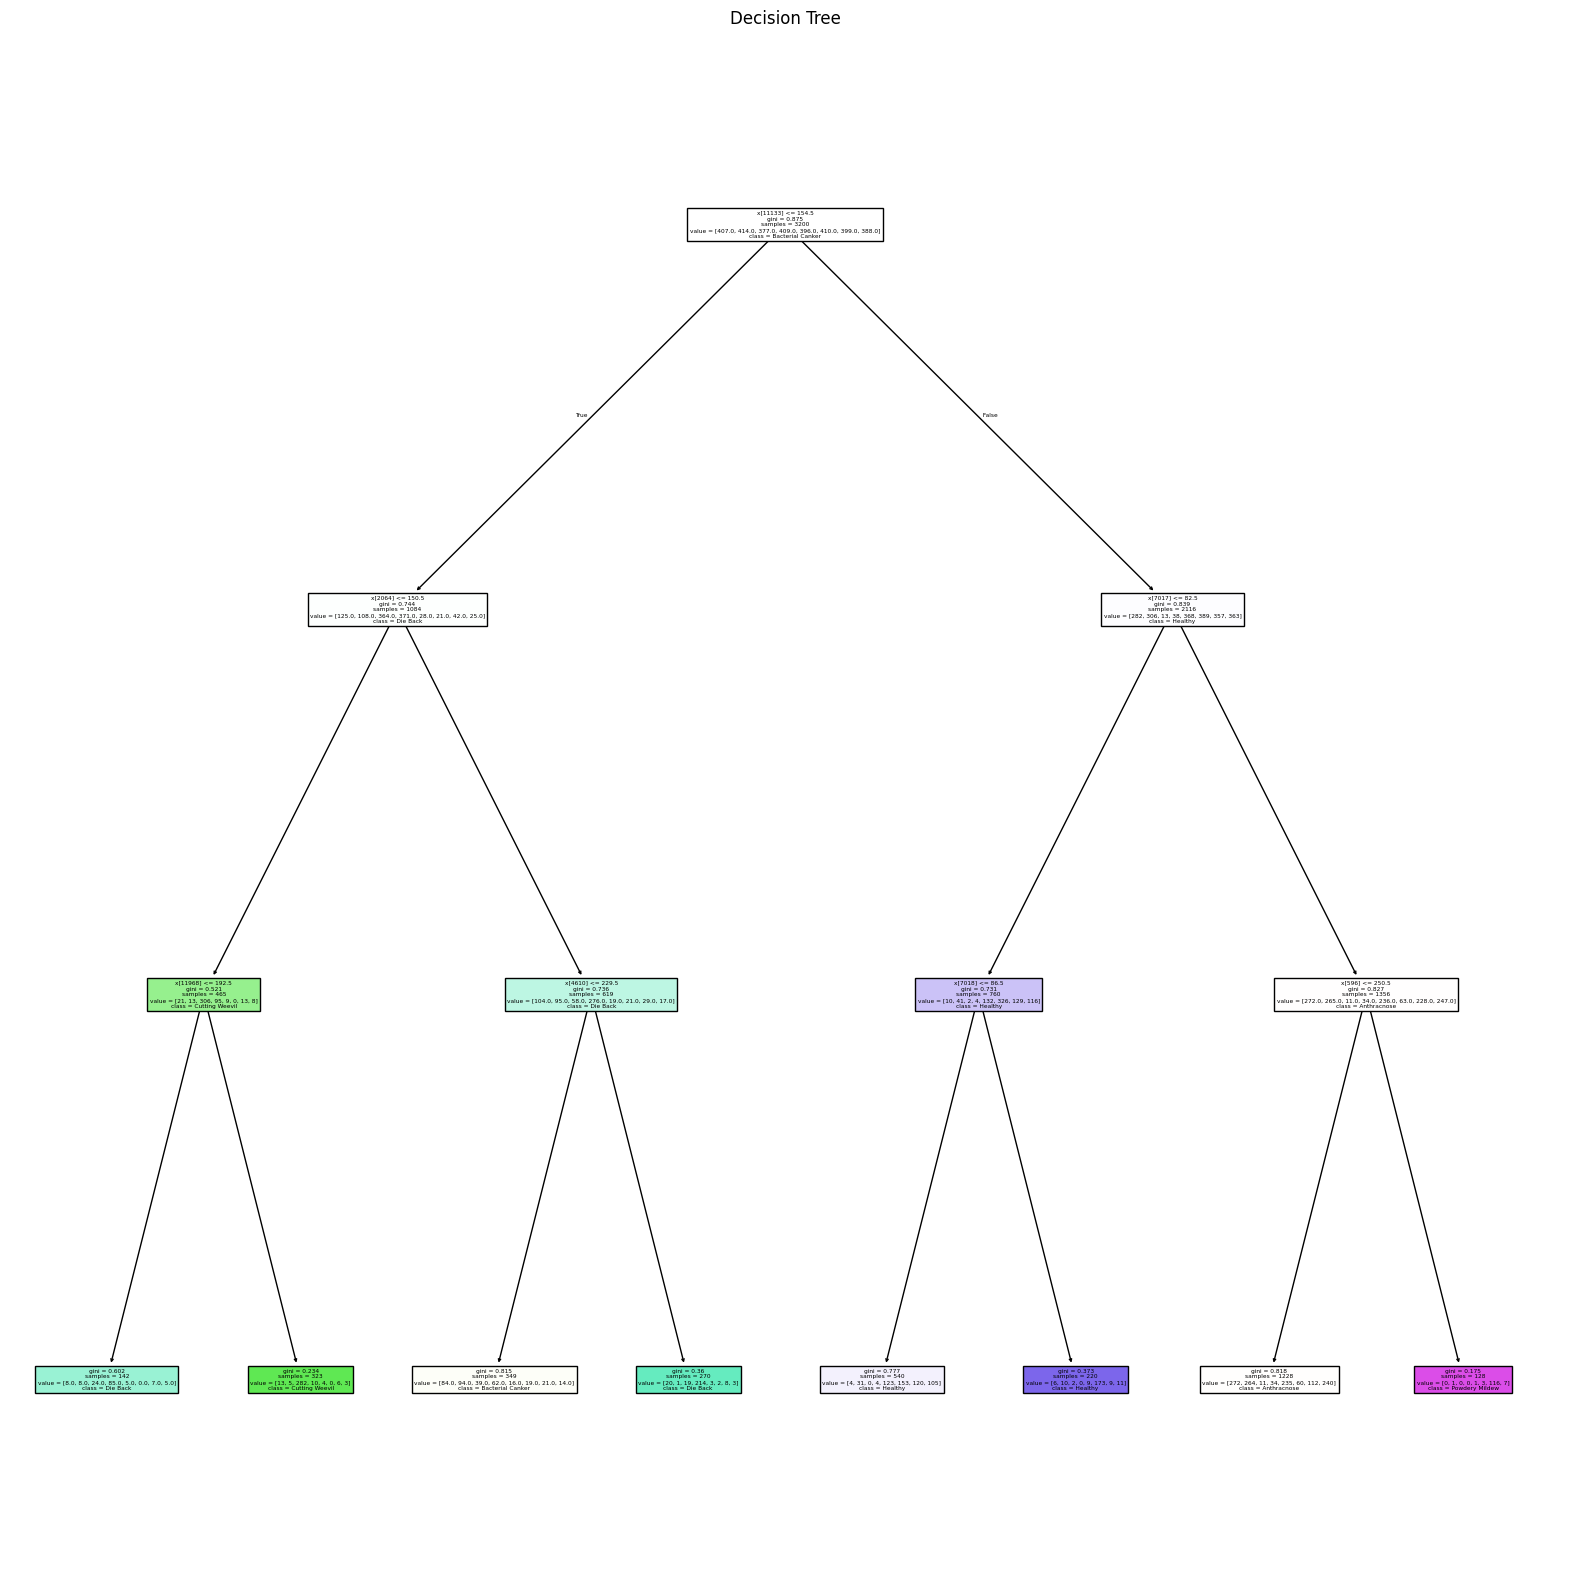

In [68]:
# Plot the decision tree
plt.figure(figsize=(20, 20))
plot_tree(dt, feature_names=None, class_names=np.unique(y_train), filled=True)
plt.title('Decision Tree')
plt.show()

### **The visualization of Random Forrest:**

In [63]:
from sklearn.ensemble import RandomForestClassifier

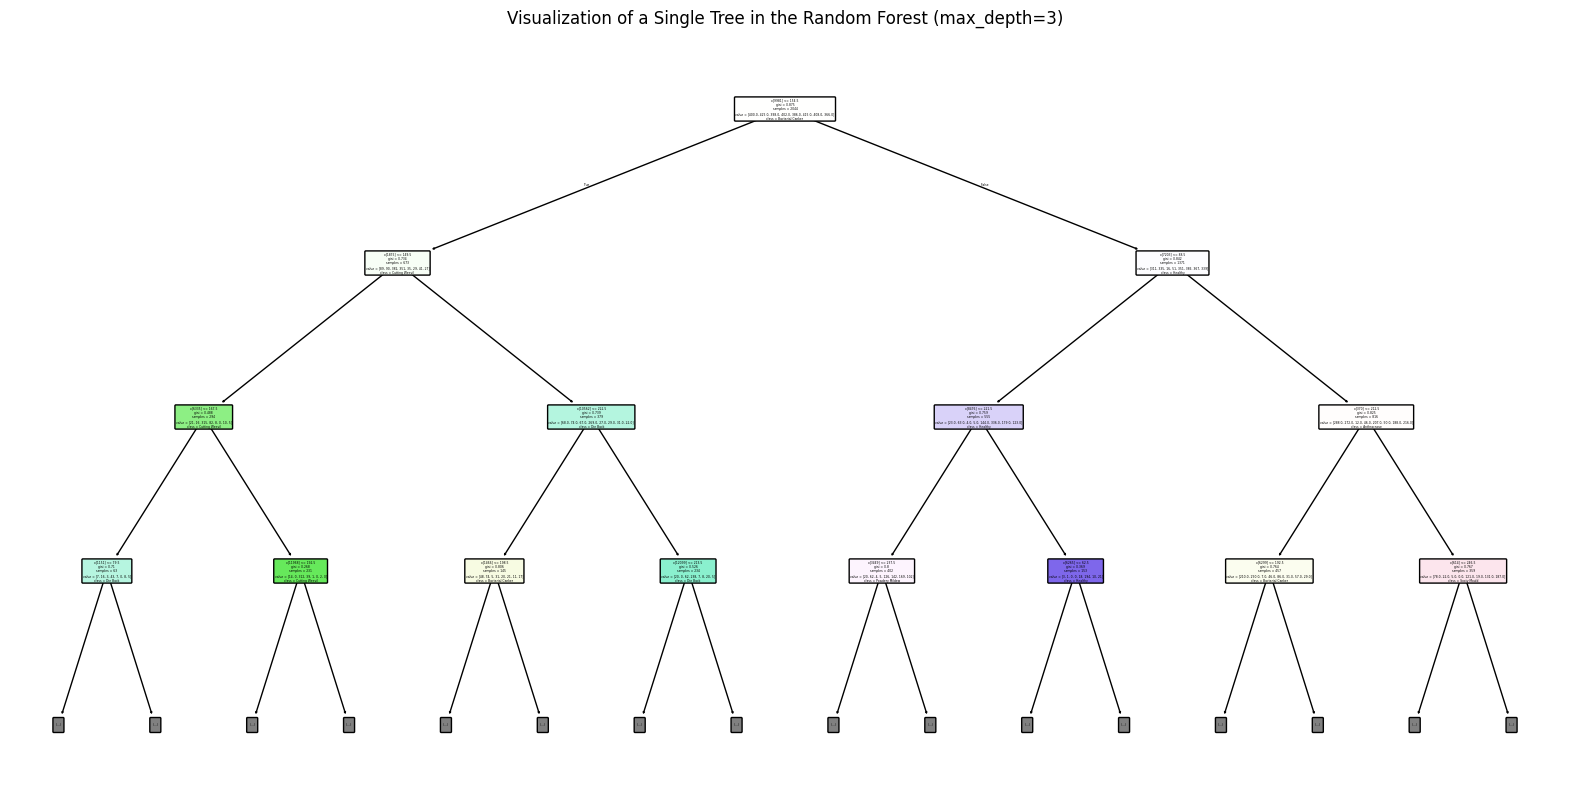

In [70]:
# Train the Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Select a single tree from the Random Forest
tree = rf_clf.estimators_[0]  # You can change the index to view other trees

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=None, class_names=np.unique(y_train), rounded=True, max_depth=3)
plt.title("Visualization of a Single Tree in the Random Forest (max_depth=3)")
plt.show()


### **The evaluation and comparison of performance of Random Forest and Decision Tree:**

Decision Tree Accuracy: 0.41125
Decision Tree Classification Report:
                   precision    recall  f1-score   support

     Anthracnose       0.21      0.69      0.32        93
Bacterial Canker       0.21      0.17      0.19        86
  Cutting Weevil       0.91      0.74      0.82       123
        Die Back       0.57      0.75      0.64        91
      Gall Midge       0.00      0.00      0.00       104
         Healthy       0.40      0.77      0.52        90
  Powdery Mildew       0.81      0.22      0.34       101
     Sooty Mould       0.00      0.00      0.00       112

        accuracy                           0.41       800
       macro avg       0.39      0.42      0.35       800
    weighted avg       0.40      0.41      0.36       800



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


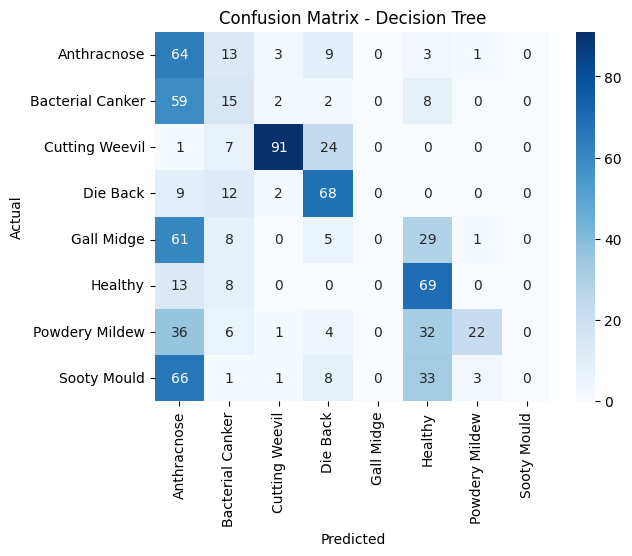

Random Forest Accuracy: 0.88
Random Forest Classification Report:
                   precision    recall  f1-score   support

     Anthracnose       0.94      0.85      0.89        93
Bacterial Canker       0.84      0.92      0.88        86
  Cutting Weevil       0.97      1.00      0.98       123
        Die Back       0.95      0.96      0.95        91
      Gall Midge       0.73      0.80      0.76       104
         Healthy       0.87      0.88      0.87        90
  Powdery Mildew       0.91      0.83      0.87       101
     Sooty Mould       0.85      0.80      0.83       112

        accuracy                           0.88       800
       macro avg       0.88      0.88      0.88       800
    weighted avg       0.88      0.88      0.88       800



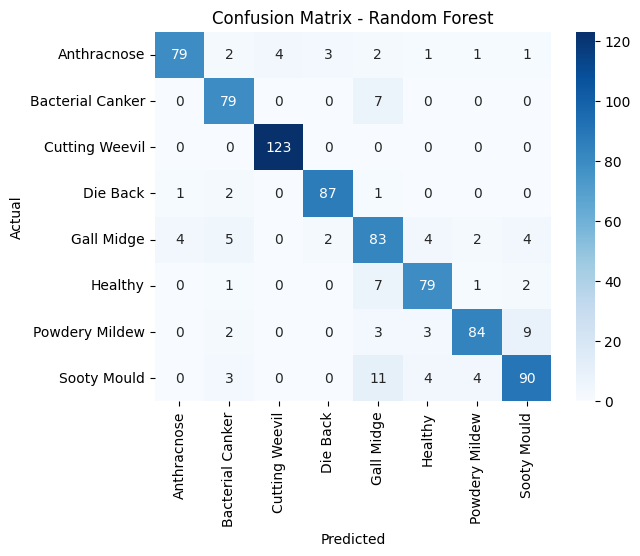

Decision Tree Accuracy: 0.41125
Random Forest Accuracy: 0.88


In [73]:
# Step 1: Make predictions on the test set for both models
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)

# Step 2: Evaluate the performance of the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 3: Evaluate the performance of the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 4: Compare the accuracies
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"Random Forest Accuracy: {accuracy_rf}")


In summary, the evaluation and comparison ensures that **Random Forest** performed **better** than Decision Tree. The **accuracy** of **Random forest** is **higher** than Decision Tree. So, Random Forest is more reliable due to its robustness against overfitting.